# **ESTADÍSTICA MULTIVARIADA: REGRESIÓN**
#### Alondra Matos Mendoza, María López Salomón

In [162]:
#Importe de librerías
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
df=pd.read_csv("calidad_de_vida.csv")
df = df.drop(['Overall rank', 'Country or region'], axis=1)

In [164]:
#Visualización de los datos
df.head(3)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341


<font color='RoyalBlue'>*Ajuste un modelo de regresión lineal*</font> 

Se divide la base de datos en la variable dependiente (*y*) y en el conjunto de variables predictoras (*Z*).

In [165]:
y = df.Score #Variable dependiente
Z = df.loc[:, df.columns !='Score'] #Variables predictoras

import statsmodels.api as sm
Z = sm.add_constant(Z, prepend=True) #Agrega una constante 
Z.head(3)

,const,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.0,1.383,1.573,0.996,0.592,0.252,0.410
2,1.0,1.488,1.582,1.028,0.603,0.271,0.341


Mediante la función *OLS* se crea el objeto de regresión lineal y se ajusta el modelo. El resumen del ajuste, se observa a continuación.

In [166]:
#Modelo
mod = sm.OLS(y,Z)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.40e-46
Time:                        05:34:24   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [167]:
#Error
s= res.mse_resid**0.5
print("RMSE: ", s)


RMSE:  0.5335188577750545


<font color='RoyalBlue'>*Comprobación de la adecuación del modelo*</font> 

Como cualquier punto con un residual grande y con un punto de apalancamiento 
$h_{ii}$ grande tiene una influencia potencial sobre el ajuste por mínimos cuadrados porque las varianzas de $\epsilon_{ii}$ varían demasiado si $h_{ii}$ son sustancialmente grandes, se examinarán los residuales estudentizados para la verificación de la adecuación del modelo.


Los residuales estudentizados son:

$$\widehat{\epsilon}_j^{*} =\frac{\widehat{\epsilon_j}}{\sqrt{s^2 (1-h_{ii})}}~~~j=1,2,...,n$$

In [168]:
#Cálculo de los errores
#Errores
y_hat = res.predict(Z) #Valores predicho
e_hat = y- y_hat
n=df.shape[0]
r=Z.shape[1]-1
H = np.array(Z)@np.linalg.inv(Z.T@ Z)@np.array(Z).T
s2= (y.T@(np.identity(n)-H)@y)/(n-(r+1))

#Errores estudentizados:
err_st = np.zeros(n)
for i in range(n):
  var  = s2*(1-H[i,i])
  err_st[i]=e_hat[i]/np.sqrt(var)

err_st

array([ 1.49379836,  0.98845221,  0.72446547,  1.05602733,  1.08077471,
        0.79708568,  0.74200219,  0.50994131,  0.61899639,  0.98030489,
        0.49199802,  1.78758784,  1.64204068,  0.24228826,  0.6288413 ,
        0.08161965,  0.61029038,  0.66637537,  0.92196449,  1.30809673,
        0.63116066, -0.02695859,  1.5472424 ,  0.2318125 ,  0.52009463,
        1.04711443,  1.61011727,  0.5787077 , -0.42780767,  0.13284986,
        0.33426449,  1.02935568,  0.09419044, -1.9916244 ,  1.61532606,
        0.36191876, -0.26825956,  0.45045305,  0.37435102,  0.13906491,
       -0.08107012,  0.61704726,  0.58611474, -0.64442061,  1.0042537 ,
        1.09278576,  0.2245653 ,  0.72879085,  0.0949324 ,  0.4627895 ,
       -0.33129279, -0.17671601,  0.41646088,  0.44894344, -0.85043791,
        0.19202119, -0.18976515, -0.99840699,  0.67078402, -0.26229832,
        0.7374178 ,  0.39146843, -0.24061548, -0.84551526,  0.14373344,
       -0.99874211,  2.08224067, -0.06802734,  0.14272782,  0.07

Se calcularon los puntos de apalancamiento (Leverage points) asociados, los cuales cuantifican el potencial de un punto para ejercer una fuerte influencia en el análisis de regresión.En particular, los puntos de apalancamiento indican presencia de 3 observaciones inusuales, pues todos son mayores que 3 veces el promedio, el cual tiene un valor de $(r+1)$.

In [169]:
#Leverage points asociados
r=Z.shape[1]-1
print("\nCantidad de atípicos",sum(np.diagonal(H)>3*(r+1)/n))


Cantidad de atípicos 3


*Gráfico de los errores*

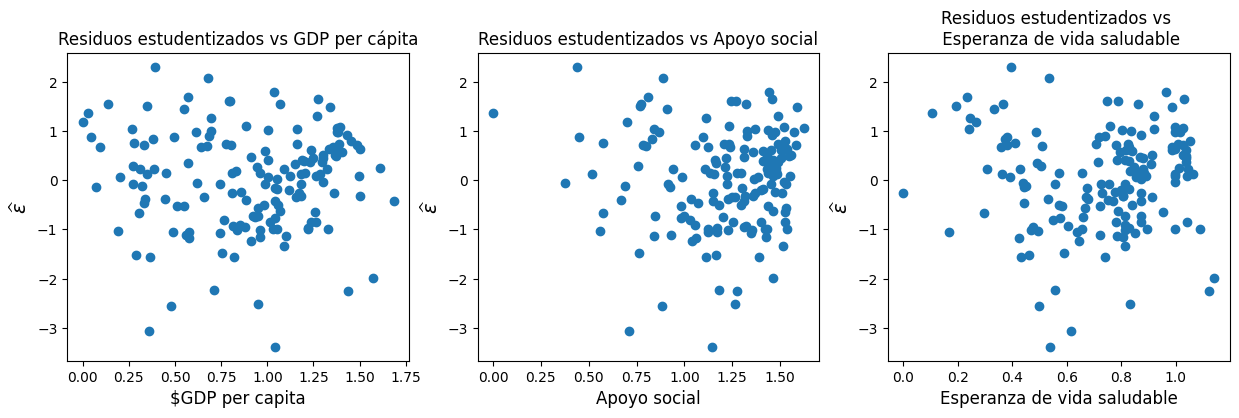

In [170]:
fig = plt.figure(figsize=(15, 4))

# Primera figura
y_hat = res.predict(Z)
Z[['GDP per capita']]
ax = fig.add_subplot(1, 3, 1)# Ejes de la primera figura
plt.scatter(Z[['GDP per capita']],err_st)
ax.set_title("Residuos estudentizados vs GDP per cápita")
ax.set_xlabel("$GDP per capita",fontsize=12)
ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)


# Segunda figura
ax = fig.add_subplot(1, 3, 2)# Ejes de la primera figura
plt.scatter(Z[['Social support']],err_st)
ax.set_title("Residuos estudentizados vs Apoyo social")
ax.set_xlabel("Apoyo social",fontsize=12)
ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)

# TTercera figura
ax = fig.add_subplot(1, 3, 3)# Ejes de la primera figura
plt.scatter(Z[['Healthy life expectancy']],err_st)
ax.set_title("Residuos estudentizados vs \n Esperanza de vida saludable")
ax.set_xlabel("Esperanza de vida saludable",fontsize=12)
ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)

plt.show()

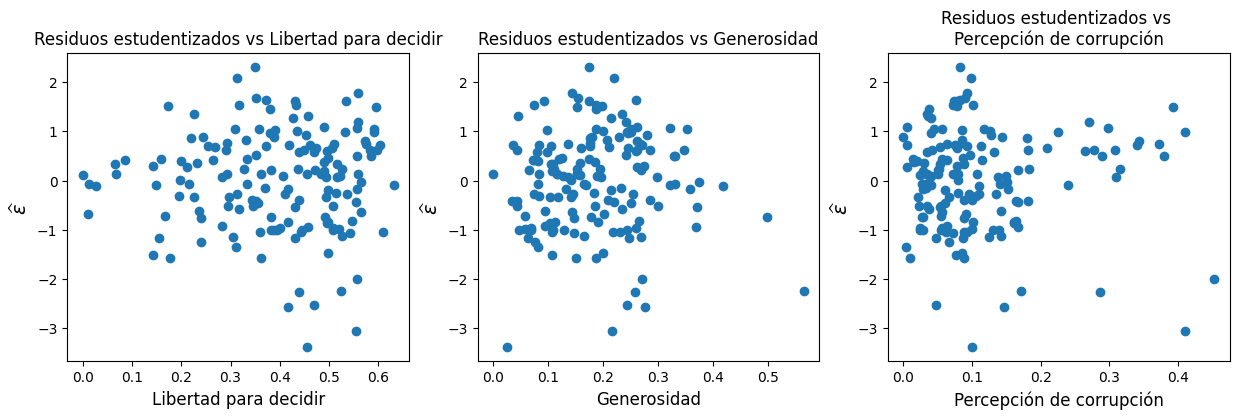

In [171]:
fig = plt.figure(figsize=(15, 4))  

# Primera figura
y_hat = res.predict(Z)
Z[['GDP per capita']]
ax = fig.add_subplot(1, 3, 1)# Ejes de la primera figura
plt.scatter(Z[['Freedom to make life choices']],err_st)
ax.set_title("Residuos estudentizados vs Libertad para decidir")
ax.set_xlabel("Libertad para decidir",fontsize=12)
ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)


# Segunda figura
ax = fig.add_subplot(1, 3, 2)# Ejes de la primera figura
plt.scatter(Z[['Generosity']],err_st)
ax.set_title("Residuos estudentizados vs Generosidad")
ax.set_xlabel("Generosidad",fontsize=12)
ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)

# TTercera figura
ax = fig.add_subplot(1, 3, 3)# Ejes de la primera figura
plt.scatter(Z[['Perceptions of corruption']],err_st)
ax.set_title("Residuos estudentizados vs \nPercepción de corrupción")
ax.set_xlabel("Percepción de corrupción",fontsize=12)
ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)

plt.show()

Las gráficas de los residuales $\widehat{\epsilon_i}$ contra los respectivos predictores no sugieren la necesidad de añadir más terminos al modelo, pues no se observa algún patrón sistemático.

El modelo es válido si:

*   Los errores se distribuyen normal, $\epsilon \sim N(0,\sigma^2 )$.
*   Los errores son independientes.
*   La varianza del error es constante.




*Verificación de supuestos*

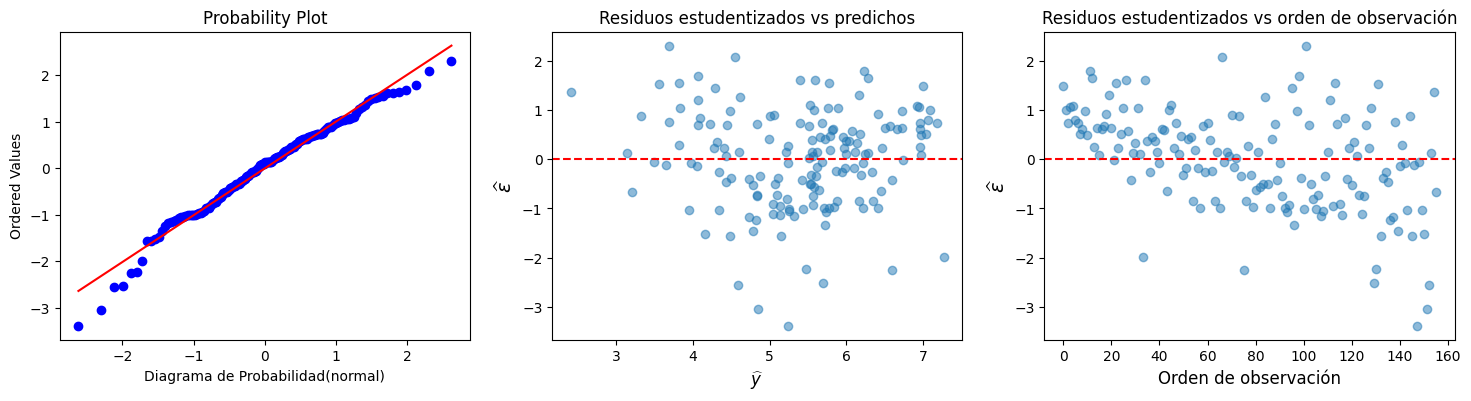

In [172]:
def ver_supuestos(y_hat,err_st):

  fig = plt.figure(figsize=(18, 4))

  ### Verificación de la normalidad ###
  #QQ-PLOT
  ax = fig.add_subplot(1, 3, 1)# Ejes de la primera figura
  from scipy import stats
  stats.probplot(err_st, plot=plt)
  ax.set_xlabel('Diagrama de Probabilidad(normal)')

  ### Verificación de la homocedasticidad ###
  # Gráfica de los residuos vs predichos
  ax = fig.add_subplot(1, 3, 2)# Ejes de la segunda figura
  plt.scatter(x=y_hat, y=err_st, alpha=0.5)
  plt.axhline(y=0,color="r",linestyle="--")
  ax.set_title('Residuos estudentizados vs predichos')
  ax.set_xlabel(r"$\widehat{y}$",fontsize=12)
  ax.set_ylabel(r"$\widehat{\epsilon}$",fontsize=14)

  ### Verificación de la independencia ###
  # Gráfica de los residuos vs tiempo
  ax = fig.add_subplot(1, 3, 3)# Ejes de la segunda figura
  plt.scatter(x=range(e_hat.shape[0]), y=err_st, alpha=0.5)
  plt.axhline(y=0,color="r",linestyle="--")
  plt.title('Residuos estudentizados vs orden de observación')
  plt.xlabel("Orden de observación",fontsize=12)
  plt.ylabel(r"$\widehat{\epsilon}$",fontsize=14)

  plt.show()

ver_supuestos(y_hat,err_st)

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.11070536375330237
Residuals are normally distributed


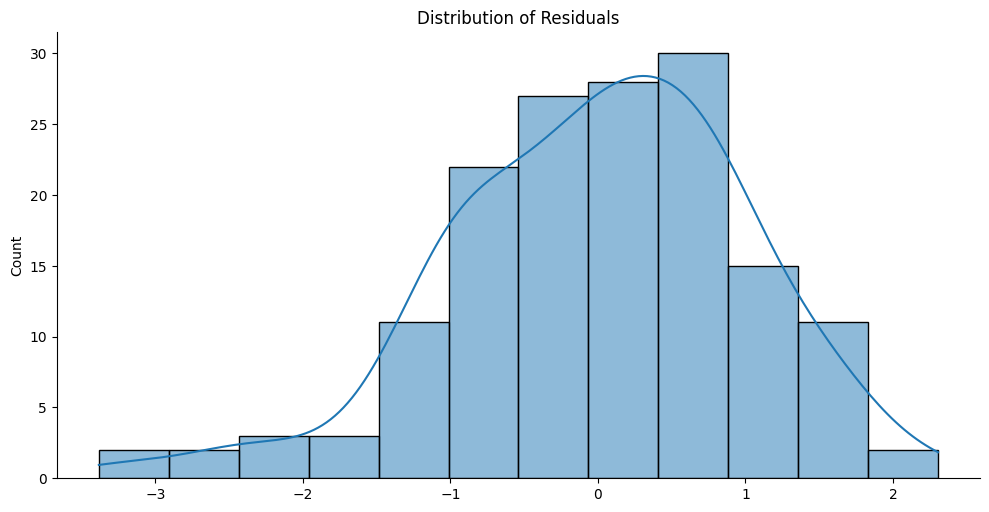


Assumption satisfied


In [173]:
#Prueba de Anderson-Darling de normalidad
  
def AnderDarling_normaltest(errors,p_value_thresh=0.05):

    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption: The error terms are normally distributed', '\n')
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(errors)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    g=sns.displot(errors,kde=True,aspect=4/2)
    g.set(title='Distribution of Residuals')
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')


AnderDarling_normaltest(err_st)

In [174]:
#Prueba de Durbin Watson para autocorrelación

def DurbinWatson_test(errors):
  from statsmodels.stats.stattools import durbin_watson

  print('Assumption 4: No Autocorrelation', '\n')

  print('\nPerforming Durbin-Watson Test')
  print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
  print('0 to 2< is positive autocorrelation')
  print('>2 to 4 is negative autocorrelation')
  print('-------------------------------------')
  durbinWatson = durbin_watson(errors)
  print('Durbin-Watson:', durbinWatson)
  if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
  elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
  else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

DurbinWatson_test(err_st)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.644146140044793
Little to no autocorrelation 

Assumption satisfied


<font color='RoyalBlue'>*Intervalos de confianza simultáneos e individuales para un nivel de significancia de α = 0.05*</font> 





*   Intervalos de confianza simultáneos




Sea $Y=Z\beta + \epsilon$, donde $Z$ tiene rango completo $r+1$ y $\epsilon \sim N_n(0,σ^2I)$. Entonces los intervalos de confianza simultáneos del $100(1-α)\%$ para las $\beta_i$ están dados por:

$$\widehat{\beta_i} \pm \sqrt{\widehat{Var}(\widehat{\beta_i})}\sqrt{(r+1)F_{r+1,n-r-1(α)}}, ~~i=0,1,...,r$$

donde  $\widehat{Var}(\widehat{\beta_i})$ es el i-ésimo elemento de la diagonal de $s^2(Z'Z)^{-1}$ y $s^2=\frac{\widehat{\epsilon}' \widehat{\epsilon}}{n-(r+1)}=\frac{y'[I-Z(Z'Z)^{-1}Z']y}{n-r-1}=\frac{y'[I-H]y}{n-r-1}$.



In [175]:
# Estimadores de mínimos cuadrados:
#   A = np.linalg.inv(Z.T@ Z)
B_hat =  np.linalg.inv(Z.T@ Z)@Z.T @y # B_hat = (Z'Z)^{-1} Z'y 

#Errores
e_hat = y- y_hat
n=df.shape[0]
r=Z.shape[1]-1
s2= (e_hat.T@e_hat)/(n-(r+1))
cov=s2*np.linalg.inv(Z.T@ Z)

#Cálculo de los intervalos de confianza simultáneos
from scipy.stats import f 
alfa=0.05
print("Intervalos de confianza simultáneos al ", 100*(1-alfa),"%")
F = f.ppf(1-alfa, r+1, n-r-1)
for i in range(r+1):
  LI = B_hat[i] - np.sqrt(cov[i,i]*(r+1)*F)
  LS = B_hat[i] + np.sqrt(cov[i,i]*(r+1)*F)
  print(round(LI,4),"<= B",i,"<=",round(LS,4))


Intervalos de confianza simultáneos al  95.0 %
0.9915 <= B 0 <= 2.599
-0.0556 <= B 1 <= 1.6064
0.2221 <= B 2 <= 2.0263
-0.1958 <= B 3 <= 2.3521
0.0255 <= B 4 <= 2.8841
-1.4056 <= B 5 <= 2.3852
-1.093 <= B 6 <= 3.0376


*   Intervalos de confianza individuales

Los intervalos de confianza del $100(1-α)\%$ para cada $\beta_i$ obtenidos de manera univariada son:

$$\widehat{\beta_i} \pm t_{n-r-1}\left(\frac{α}{2}\right)\sqrt{\widehat{Var}(\widehat{\beta_i})} ~~i=0,1,...,r$$

In [176]:
#Cálculo de los intervalos de confianza individuales
from scipy.stats import t 
alfa=0.05
print("Intervalos de confianza individuales al ", 100*(1-alfa),"%")
T = t.ppf(1-alfa/2, n-r-1)
for i in range(r+1):
  LI = B_hat[i] - T*np.sqrt(cov[i,i])
  LS = B_hat[i] + T*np.sqrt(cov[i,i])
  print(round(LI,4),"<= B",i,"<=",round(LS,4))


Intervalos de confianza individuales al  95.0 %
1.3781 <= B 0 <= 2.2123
0.3442 <= B 1 <= 1.2066
0.6561 <= B 2 <= 1.5923
0.4171 <= B 3 <= 1.7392
0.7132 <= B 4 <= 2.1965
-0.4938 <= B 5 <= 1.4733
-0.0994 <= B 6 <= 2.044


<font color='RoyalBlue'>*Prueba de la razón de verosimilitud *</font> 

En particular, se rechaza $H_0$ si

$$\frac{(SS_{res}(Z_1)-SS_{res}(Z))/(r-q)}{s^2}>F_{r-q,n-r-1}(α)$$

donde $F_{r−q, n−r−1}(α)$ es el percentil superior del $100(1-α)\%$ de una distribucion $F$
con $r − q$ y $n − r − 1$ grados de libertad.

In [177]:
#Cálculo del estadístico de prueba 
q=4
r = 6
Z2=Z.iloc[:,[0,1,2,3,4]]
B2=np.linalg.inv(Z2.T@Z2)@Z2.T@y
SS_parcial = (y-Z2@B2.values).T@(y-Z2@B2.values)
SS_total =(y-Z@B_hat.values).T@(y-Z@B_hat.values)
F_ratio=((SS_parcial-SS_total)/(r-q))/(SS_total/(n-r-1))
print("SS parcial:", round(SS_parcial,4), "SS total:",round(SS_total,4),"F ratio:", round(F_ratio,4))

SS parcial: 43.9926 SS total: 42.4117 F ratio: 2.7769


In [178]:
#Cálculo del valor crítico
alfa=0.05
F_critical = f.ppf(1-alfa, r-q, n-r-1)
print("F_{r-q,n-r-1}(α): ",round(F_critical,4))

F_{r-q,n-r-1}(α):  3.0568


Considerando que $2.77<F_{2,149}(0.05)=3.05$, no hay suficiente evidencia estadística para rechazar $H_0$.

### Reajustando el modelo sin las últimas 2 variables

In [179]:
y = df.Score #Variable dependiente
Z = df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']] #Variables predictoras

import statsmodels.api as sm
Z = sm.add_constant(Z, prepend=True) #Agrega una constante 
Z.head(3)

,const,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,1.0,1.340,1.587,0.986,0.596
1,1.0,1.383,1.573,0.996,0.592
2,1.0,1.488,1.582,1.028,0.603


Mediante la función *OLS* se crea el objeto de regresión lineal y se ajusta el modelo. El resumen del ajuste, se observa a continuación.

In [180]:
#Modelo
mod = sm.OLS(y,Z)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     127.0
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.82e-47
Time:                        05:34:27   Log-Likelihood:                -122.62
No. Observations:                 156   AIC:                             255.2
Df Residuals:                     151   BIC:                             270.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [181]:
#Error
s= res.mse_resid**0.5
print("RMSE: ", s)


RMSE:  0.5397606322991123


In [182]:
#Cálculo de los errores
#Errores
y_hat = res.predict(Z) #Valores predicho
e_hat = y- y_hat
n=df.shape[0] #número de datos
r=Z.shape[1]-1 #Número de variables predictoras
H = np.array(Z)@np.linalg.inv(Z.T@ Z)@np.array(Z).T
s2= (y.T@(np.identity(n)-H)@y)/(n-(r+1))

#Errores estudentizados:
err_st = np.zeros(n)
for i in range(n):
  var  = s2*(1-H[i,i])
  err_st[i]=e_hat[i]/np.sqrt(var)

#Leverage points asociados
print("\nCantidad de atípicos",sum(np.diagonal(H)>3*(r+1)/n))


Cantidad de atípicos 3


Según los puntos de apalancamiento asociados, se considera que solo hay un dato atípico; pues solo un caso cumple que $h_{ii}>\frac{3(r+1)}{n}=0.2142$, en donde $r$ es el número de variables ($r=2$) y $n$ el número de registros $(n=42)$.

El modelo es válido si:

*   Los errores se distribuyen normal, $\epsilon \sim N(0,\sigma^2 )$.
*   Los errores son independientes.
*   La varianza del error es constante.

*Verificación de supuestos*

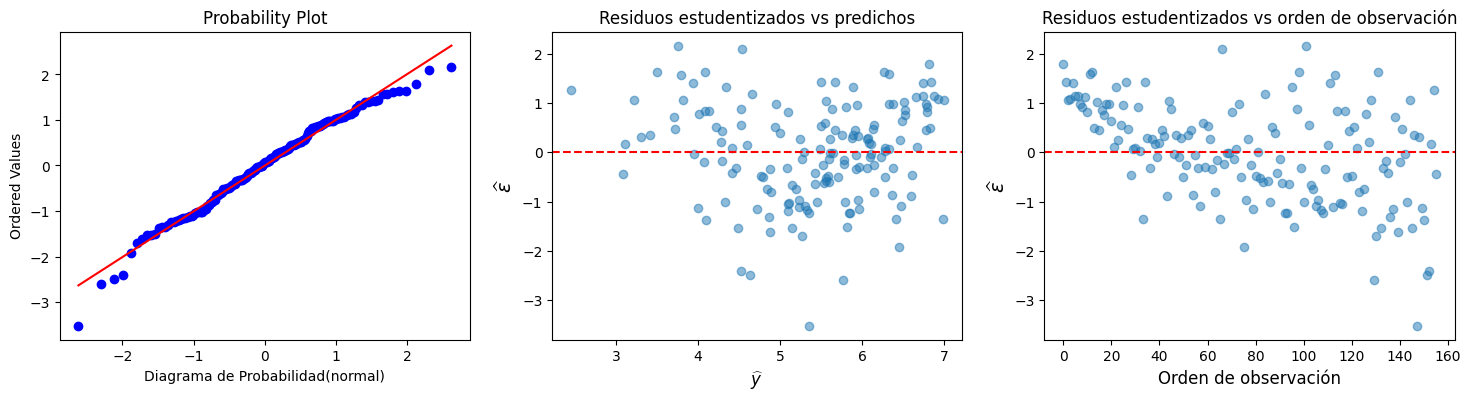

In [183]:
ver_supuestos(y_hat,err_st)

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.2799360918971039
Residuals are normally distributed


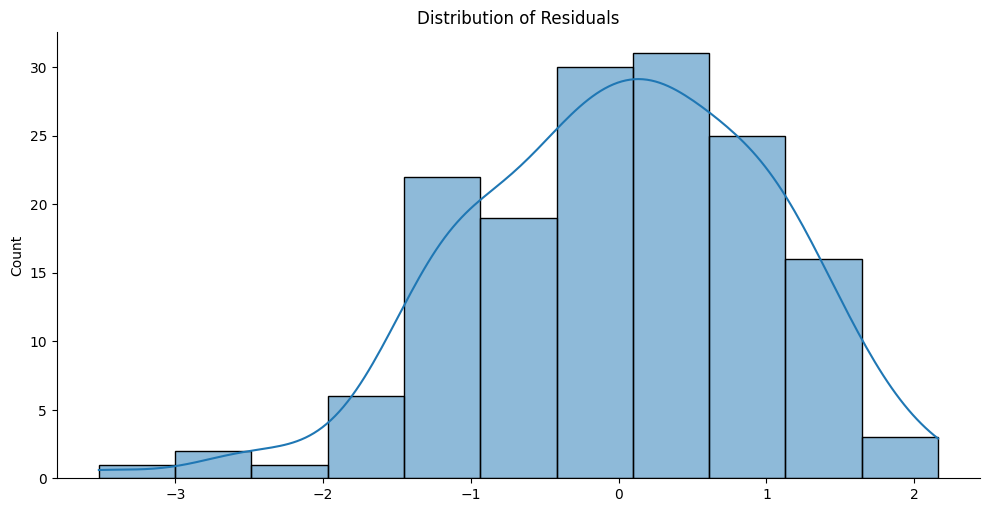


Assumption satisfied


In [184]:
#Prueba de Anderson-Darling de normalidad
  
def AnderDarling_normaltest(errors,p_value_thresh=0.05):

    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption: The error terms are normally distributed', '\n')
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(errors)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    g=sns.displot(errors,kde=True,aspect=4/2)
    g.set(title='Distribution of Residuals')
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')


AnderDarling_normaltest(err_st)

In [185]:
#Prueba de Durbin Watson para autocorrelación

def DurbinWatson_test(errors):
  from statsmodels.stats.stattools import durbin_watson

  print('Assumption 4: No Autocorrelation', '\n')

  print('\nPerforming Durbin-Watson Test')
  print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
  print('0 to 2< is positive autocorrelation')
  print('>2 to 4 is negative autocorrelation')
  print('-------------------------------------')
  durbinWatson = durbin_watson(errors)
  print('Durbin-Watson:', durbinWatson)
  if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
  elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
  else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

DurbinWatson_test(err_st)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6445892846530878
Little to no autocorrelation 

Assumption satisfied


<font color='LightSeaGreen'>*Intervalos de confianza simultáneos e individuales para un nivel de significancia de α = 0.05*</font> 

*   Intervalos de confianza simultáneos al $95\%$

In [186]:
# Estimadores de mínimos cuadrados:
# B_hat = (Z'Z)^{-1} Z'y 
#   A = np.linalg.inv(Z.T@ Z)
B_hat =  np.linalg.inv(Z.T@ Z)@Z.T @y

#Errores
e_hat = y- y_hat
n=y.shape[0]
r=Z.shape[1]-1
H = np.array(Z)@np.linalg.inv(Z.T@ Z)@np.array(Z).T
s2= (y.T@(np.identity(n)-H)@y)/(n-(r+1))
#s2=(e_hat.T@e_hat)/(n-(r+1))
cov=s2*np.linalg.inv(Z.T@ Z)

#Intervalos de confianza
from scipy.stats import f 
alfa=0.05
print("Intervalos de confianza simultáneos al ", 100*(1-alfa),"%")
F = f.ppf(1-alfa, r+1, n-r-1)
for i in range(r+1):
  LI = B_hat[i] - np.sqrt(cov[i,i]*(r+1)*F)
  LS = B_hat[i] + np.sqrt(cov[i,i]*(r+1)*F)
  print(round(LI,4),"<= B",i,"<=",round(LS,4))

Intervalos de confianza simultáneos al  95.0 %
1.2198 <= B 0 <= 2.5644
0.0807 <= B 1 <= 1.5404
0.225 <= B 2 <= 1.8082
0.004 <= B 3 <= 2.2789
0.698 <= B 4 <= 2.9936


*   Intervalos de confianza individuales al $95\%$



In [187]:
#Intervalos de confianza individuales
from scipy.stats import t 
alfa=0.05
print("Intervalos de confianza individuales al ", 100*(1-alfa),"%")
T = t.ppf(1-alfa/2, n-r-1)
for i in range(r+1):
  LI = B_hat[i] - T*np.sqrt(cov[i,i])
  LS = B_hat[i] + T*np.sqrt(cov[i,i])
  print(round(LI,4),"<= B",i,"<=",round(LS,4))

Intervalos de confianza individuales al  95.0 %
1.4982 <= B 0 <= 2.286
0.3829 <= B 1 <= 1.2382
0.5528 <= B 2 <= 1.4804
0.475 <= B 3 <= 1.8079
1.1733 <= B 4 <= 2.5184
